Cobalt-60 has peak wavelengths at 1.175 & 1.333 MeV


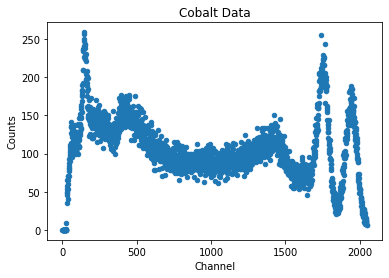

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import linregress, norm
from scipy.optimize import curve_fit
import datetime

cobalt = pd.read_csv("CalCo60 01Ga.csv", skiprows = 21, usecols = [0, 2])

print("Cobalt-60 has peak wavelengths at 1.175 & 1.333 MeV")

ax2 = cobalt.plot.scatter(x = cobalt.columns[0], y = cobalt.columns[1])
ax2.set_title("Cobalt Data")

plt.show()

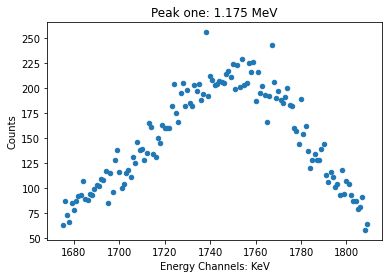

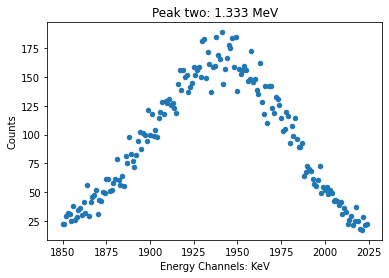

In [3]:
# Calibration Co60
# Peaks at 1.175 & 1.333 MeV
cobalt_peak_1 = cobalt.iloc[1675:1810].copy()
ax1 = cobalt_peak_1.plot.scatter(cobalt_peak_1.columns[0], cobalt_peak_1.columns[1])
ax1.set_title("Peak one: 1.175 MeV")
ax1.set_xlabel("Energy Channels: KeV")

cobalt_peak_2 = cobalt.iloc[1850:2025].copy()
ax2 = cobalt_peak_2.plot.scatter(cobalt_peak_2.columns[0], cobalt_peak_2.columns[1])
ax2.set_title("Peak two: 1.333 MeV")
ax2.set_xlabel("Energy Channels: KeV")

plt.show()

In [4]:
# Creating gaussian functions
def gaussian(x, amplitude, mu, sigma, y_offset):
    return amplitude * np.exp(-((x - mu)**2) / (2 * sigma**2)) + y_offset

def gaussian2(x, amp1, amp2, mu1, mu2, sigma1, sigma2, y_offset):
    return (amp1 * np.exp(-((x - mu1) ** 2) / (2 * sigma1 ** 2)
                         + amp2 * np.exp(-((x - mu2) ** 2) / (2 * sigma2 ** 2)) + y_offset))

def gaussian(x, amplitude, mu, sigma, y_offset):
    return amplitude * np.exp(-((x - mu)**2) / (2 * sigma**2)) + y_offset

def gaussian2(x, amp1, amp2, mu1, mu2, sigma1, sigma2, y_offset):
    return (amp1 * np.exp(-((x - mu1) ** 2) / (2 * sigma1 ** 2)
                         + amp2 * np.exp(-((x - mu2) ** 2) / (2 * sigma2 ** 2)) + y_offset))

def find_values(A, B, C, D, xdata, ydata):
    # Popt = parameters optimized
    # Pcov = Covariance, variance = error squared
    popt, pcov = curve_fit(gaussian, xdata, ydata, 
                          p0=[A, B, C, D]) 

    amplitude, mean, sigma, vertical_offset = popt
    sigma_amp, sigma_mean, sigma_std, sigma_b = np.sqrt(np.diag(pcov))
    
    plt.scatter(xdata, ydata, label="Data", marker='.')
    plt.plot(xdata, gaussian(xdata, *popt), label="Best Fit", color="red")
    
    print()
    
    print("Optimized Parameters:")
    print("[Amplitude, Mean, Sigma, Vertical Offset]")
    print(f"Amplitude: {amplitude:.2f}, Mean: {mean:.2f}, Sigma: {sigma:.2f}, y_offset: {vertical_offset:.2f}")
    print()
    print(f"Uncertainty in amplitude: {sigma_amp:.2f}, Uncertainty in mean: {sigma_mean:.2f}")
    print(f"Sigma standard deviation: {sigma_std:.2f}, Uncertainty in y offset: {sigma_b:.2f}")
    
    return amplitude, mean, sigma, vertical_offset, sigma_amp, sigma_mean, sigma_std, sigma_b

def find_uncertainties(values):
    sigma_amp, sigma_mean, sigma_std, sigma_b = values[4:]
    return sigma_amp, sigma_mean, sigma_std, sigma_b


Optimized Parameters:
[Amplitude, Mean, Sigma, Vertical Offset]
Amplitude: 150.64, Mean: 1748.19, Sigma: -31.17, y_offset: 65.56

Uncertainty in amplitude: 6.28, Uncertainty in mean: 0.57
Sigma standard deviation: 1.61, Uncertainty in y offset: 6.81

Optimized Parameters:
[Amplitude, Mean, Sigma, Vertical Offset]
Amplitude: 156.96, Mean: 1939.07, Sigma: 39.02, y_offset: 9.62

Uncertainty in amplitude: 3.83, Uncertainty in mean: 0.43
Sigma standard deviation: 1.22, Uncertainty in y offset: 4.18


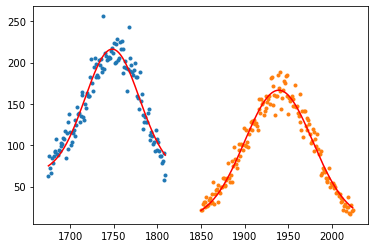

In [6]:
A = 210  #amplitude
B = 1755 #mu
C = 65   #sigma
D = 180  #vertical_offset
xdata = cobalt_peak_1.iloc[:, 0].values
ydata = cobalt_peak_1.iloc[:, 1].values

cobalt_peak_1_values = find_values(A, B, C, D, xdata, ydata)

sigma_amp, sigma_mean, sigma_std, sigma_b = find_uncertainties(cobalt_peak_1_values)

A = 180
B = 1940
C = 40
D = 150

xdata = cobalt_peak_2.iloc[:,0].values
ydata = cobalt_peak_2.iloc[:, 1].values

cobalt_peak_2_values = find_values(A, B, C, D, xdata, ydata)

sigma_amp, sigma_mean, sigma_std, sigma_b = find_uncertainties(cobalt_peak_2_values)

Sodium-22 has known peaks at 0.511 & 1.2745 MeV
Cadmium 109 has a known peak at 0.0088 MeV
Cobalt-57 has a known peak at 0.122 MeV
Manganese-54 has a peak at 0.835 MeV
Barium-133 has peaks 0.081, 0.276, 0.303, 0.356, & 0.384 MeV


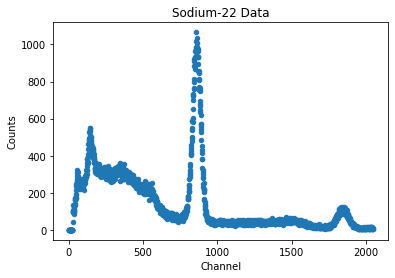

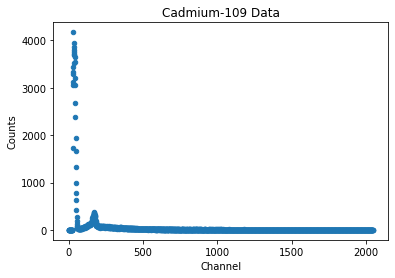

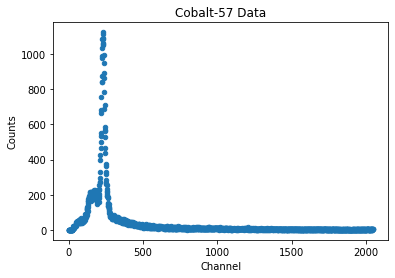

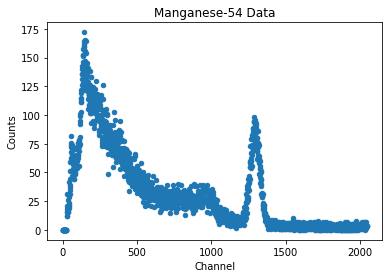

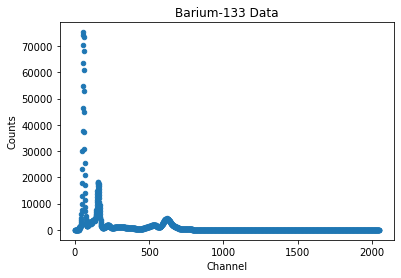

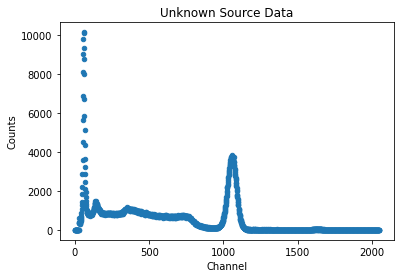

In [7]:
sodium      = pd.read_csv("CalNa22 02Ga.csv", skiprows = 21, usecols = [0, 2])
cadmium     = pd.read_csv("CalCd109 03Ga.csv", skiprows = 21, usecols = [0, 2])
cobalt57    = pd.read_csv("Co57 04Ga.csv", skiprows = 21, usecols = [0, 2])
manganese   = pd.read_csv("Mn54 05Ga.csv", skiprows = 21, usecols = [0, 2])
barium      = pd.read_csv("Ba133 06Ga.csv", skiprows = 21, usecols = [0, 2])
unknown     = pd.read_csv("Unknown 7.csv", skiprows = 21, usecols = [0, 2])

print("Sodium-22 has known peaks at 0.511 & 1.2745 MeV")
print("Cadmium 109 has a known peak at 0.0088 MeV")
print("Cobalt-57 has a known peak at 0.122 MeV")
print("Manganese-54 has a peak at 0.835 MeV")
print("Barium-133 has peaks 0.081, 0.276, 0.303, 0.356, & 0.384 MeV")

Na_plot = sodium.plot.scatter(sodium.columns[0], sodium.columns[1])
Na_plot.set_title("Sodium-22 Data")

Cd_plot = cadmium.plot.scatter(cadmium.columns[0], cadmium.columns[1])
Cd_plot.set_title("Cadmium-109 Data")

Co57_plot = cobalt57.plot.scatter(cobalt57.columns[0], cobalt57.columns[1])
Co57_plot.set_title("Cobalt-57 Data")

Mn_plot = manganese.plot.scatter(manganese.columns[0], manganese.columns[1])
Mn_plot.set_title("Manganese-54 Data")

Ba_plot = barium.plot.scatter(barium.columns[0], barium.columns[1])
Ba_plot.set_title("Barium-133 Data")

unk_plot = unknown.plot.scatter(unknown.columns[0], unknown.columns[1])
unk_plot.set_title("Unknown Source Data")

plt.show()


Optimized Parameters:
[Amplitude, Mean, Sigma, Vertical Offset]
Amplitude: 938.31, Mean: 860.33, Sigma: 26.56, y_offset: 54.79

Uncertainty in amplitude: 9.86, Uncertainty in mean: 0.15
Sigma standard deviation: 0.38, Uncertainty in y offset: 10.64

Optimized Parameters:
[Amplitude, Mean, Sigma, Vertical Offset]
Amplitude: 101.46, Mean: 1842.52, Sigma: 36.31, y_offset: 11.88

Uncertainty in amplitude: 1.82, Uncertainty in mean: 0.51
Sigma standard deviation: 0.95, Uncertainty in y offset: 1.75


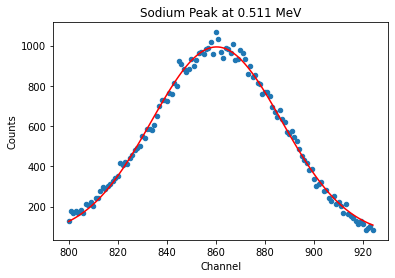

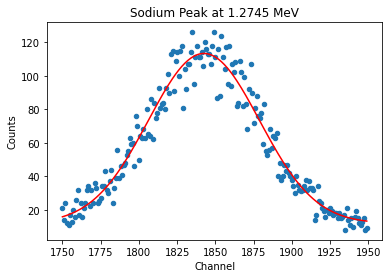

In [8]:
A = 1000
B = 900
C = 30
D = 50

sodium_peak_1 = sodium.iloc[800:925].copy()
ax1 = sodium_peak_1.plot.scatter(sodium_peak_1.columns[0], sodium_peak_1.columns[1])
ax1.set_title("Sodium Peak at 0.511 MeV")

xdata_Na = sodium_peak_1.iloc[:,0].values
ydata_Na = sodium_peak_1.iloc[:,1].values

sodium_peak_1_values = find_values(A, B, C, D, xdata_Na, ydata_Na)

sigma_amp, sigma_mean, sigma_std, sigma_b = find_uncertainties(sodium_peak_1_values)

sodium_peak_2 = sodium.iloc[1750:1950].copy()
ax2 = sodium_peak_2.plot.scatter(sodium_peak_2.columns[0], sodium_peak_2.columns[1])
ax2.set_title("Sodium Peak at 1.2745 MeV")

A = 120
B = 1850
C = 30
D = 20

xdata_Na = sodium_peak_2.iloc[:,0].values
ydata_Na = sodium_peak_2.iloc[:,1].values

sodium_peak_2_values = find_values(A, B, C, D, xdata_Na, ydata_Na)

sigma_amp, sigma_mean, sigma_std, sigma_b = find_uncertainties(sodium_peak_2_values)


Optimized Parameters:
[Amplitude, Mean, Sigma, Vertical Offset]
Amplitude: 4328.12, Mean: 37.48, Sigma: 7.99, y_offset: -221.31

Uncertainty in amplitude: 235.04, Uncertainty in mean: 0.37
Sigma standard deviation: 0.60, Uncertainty in y offset: 203.91


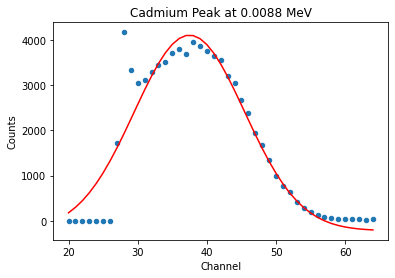

In [9]:
A = 3000
B = 40
C = 10
D = 200

cadmium_peak_1 = cadmium.iloc[20:65].copy()
ax1 = cadmium_peak_1.plot.scatter(cadmium_peak_1.columns[0], cadmium_peak_1.columns[1])
ax1.set_title("Cadmium Peak at 0.0088 MeV")

xdata_Ca = cadmium_peak_1.iloc[:,0].values
ydata_Ca = cadmium_peak_1.iloc[:,1].values

cadmium_peak_1_values = find_values(A, B, C, D, xdata_Ca, ydata_Ca)

sigma_amp, sigma_mean, sigma_std, sigma_b = find_uncertainties(cadmium_peak_1_values)


Optimized Parameters:
[Amplitude, Mean, Sigma, Vertical Offset]
Amplitude: 896.36, Mean: 230.98, Sigma: 9.90, y_offset: 208.01

Uncertainty in amplitude: 18.89, Uncertainty in mean: 0.10
Sigma standard deviation: 0.27, Uncertainty in y offset: 20.52


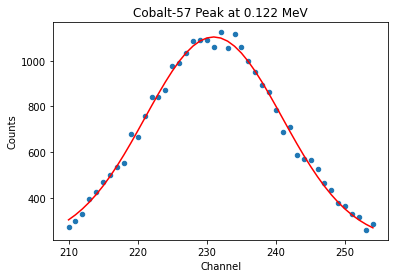

In [10]:
A = 1000
B = 230
C = 10
D = 150

cobalt57_peak_1 = cobalt57.iloc[210:255].copy()
ax1 = cobalt57_peak_1.plot.scatter(cobalt57_peak_1.columns[0], cobalt57_peak_1.columns[1])
ax1.set_title("Cobalt-57 Peak at 0.122 MeV")

xdata_Co = cobalt57_peak_1.iloc[:,0].values
ydata_Co = cobalt57_peak_1.iloc[:,1].values

cobalt57_peak_1_values = find_values(A, B, C, D, xdata_Co, ydata_Co)

sigma_amp, sigma_mean, sigma_std, sigma_b = find_uncertainties(cobalt57_peak_1_values)


Optimized Parameters:
[Amplitude, Mean, Sigma, Vertical Offset]
Amplitude: 82.88, Mean: 1292.94, Sigma: 33.01, y_offset: 3.16

Uncertainty in amplitude: 2.25, Uncertainty in mean: 0.45
Sigma standard deviation: 1.17, Uncertainty in y offset: 2.42


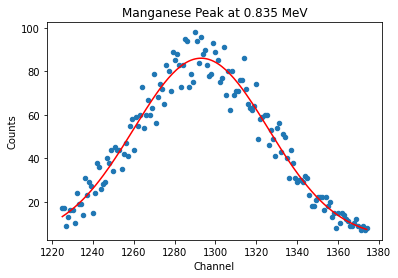

In [11]:
A = 100
B = 1280
C = 30
D = 20

manganese_peak_1 = manganese.iloc[1225:1375].copy()
ax1 = manganese_peak_1.plot.scatter(manganese_peak_1.columns[0], manganese_peak_1.columns[1])
ax1.set_title("Manganese Peak at 0.835 MeV")

xdata_Mn = manganese_peak_1.iloc[:,0].values
ydata_Mn = manganese_peak_1.iloc[:,1].values

manganese_peak_1_values = find_values(A, B, C, D, xdata_Mn, ydata_Mn)

sigma_amp, sigma_mean, sigma_std, sigma_b = find_uncertainties(manganese_peak_1_values)


Optimized Parameters:
[Amplitude, Mean, Sigma, Vertical Offset]
Amplitude: 8188.53, Mean: 59.63, Sigma: 4.53, y_offset: 1886.73

Uncertainty in amplitude: 171.74, Uncertainty in mean: 0.08
Sigma standard deviation: 0.13, Uncertainty in y offset: 153.30

Optimized Parameters:
[Amplitude, Mean, Sigma, Vertical Offset]
Amplitude: 3742.74, Mean: 1056.83, Sigma: 29.04, y_offset: 31.77

Uncertainty in amplitude: 31.32, Uncertainty in mean: 0.08
Sigma standard deviation: 0.28, Uncertainty in y offset: 34.24


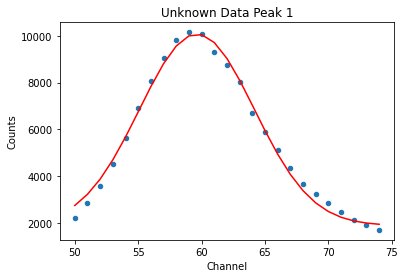

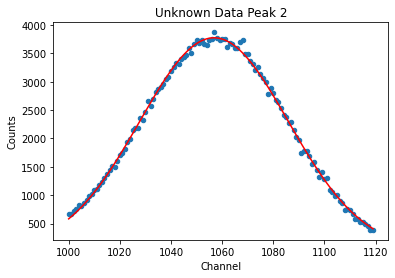

In [12]:
A = 10000 
B = 60
C = 10
D = 2000


unknown_peak_1 = unknown.iloc[50:75].copy()
ax1 = unknown_peak_1.plot.scatter(unknown_peak_1.columns[0], unknown_peak_1.columns[1])
ax1.set_title("Unknown Data Peak 1")

xdata_unk = unknown_peak_1.iloc[:,0].values
ydata_unk = unknown_peak_1.iloc[:,1].values

unknown_peak_1_values = find_values(A, B, C, D, xdata_unk, ydata_unk)

sigma_amp, sigma_mean, sigma_std, sigma_b = find_uncertainties(unknown_peak_1_values)

A = 3500
B = 1060
C = 50
D = 400

unknown_peak_2 = unknown.iloc[1000:1120].copy()
ax1 = unknown_peak_2.plot.scatter(unknown_peak_2.columns[0], unknown_peak_2.columns[1])
ax1.set_title("Unknown Data Peak 2")

xdata_unk = unknown_peak_2.iloc[:,0].values
ydata_unk = unknown_peak_2.iloc[:,1].values

unknown_peak_2_values = find_values(A, B, C, D, xdata_unk, ydata_unk)

sigma_amp, sigma_mean, sigma_std, sigma_b = find_uncertainties(unknown_peak_2_values)

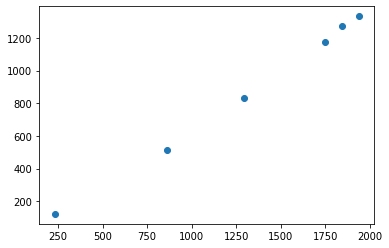

Average uncertainty in amplitude:          7.16
Average uncertainty in means:              0.37
Average uncertainty in Standard Deviation: 0.93
Average uncertainty in y-intercept:        7.72


In [16]:
# Storing found values
value_bank = {
    (cobalt_peak_1_values, 1175), 
    (cobalt_peak_2_values, 1333),
    (sodium_peak_1_values, 511),
    (sodium_peak_2_values, 1274.5),
    # Our cadmium data throws off everything
    #(cadmium_peak_1_values, 8.8),
    (cobalt57_peak_1_values, 122),
    (manganese_peak_1_values, 835),
    (unknown_peak_1_values, None),
    (unknown_peak_2_values, None)
}

tested_means    = []
known_means     = []

sigma_amp_list  = []
sigma_mean_list = []
sigma_std_list  = []
sigma_b_list    = []



for (tested, known) in value_bank:
    if known is None:
        pass
    else:
        # sigma_amp, sigma_mean, sigma_std, sigma_b
        uncertainties = find_uncertainties(tested)

        tested_means.append(tested[1])
        known_means.append(known)
        
        sigma_amp_list.append(uncertainties[0])
        sigma_mean_list.append(uncertainties[1])
        sigma_std_list.append(uncertainties[2])
        sigma_b_list.append(uncertainties[3])        

ax1 = plt.scatter(tested_means, known_means)
plt.show()

print(f"Average uncertainty in amplitude:          {np.mean(sigma_amp_list):.2f}")
print(f"Average uncertainty in means:              {np.mean(sigma_mean_list):.2f}")
print(f"Average uncertainty in Standard Deviation: {np.mean(sigma_std_list):.2f}")
print(f"Average uncertainty in y-intercept:        {np.mean(sigma_b_list):.2f}")

#print(sigma_b_list)
#print(sigma_amp_list)